In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

In [3]:
# image = mpimg.imread('exit-ramp.png')
image = cv2.imread('exit-ramp.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
# Define a kernel size and apply Gaussian Smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

In [10]:
# Define parameters for Canny
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
print('edges shape: ', edges.shape)

edges shape:  (540, 960)


In [6]:
# Define the Hough Transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1
# Make a copy and turn values into 0, create a blank to draw on
line_image = np.copy(image) * 0

In [7]:
# Run Hough on edge detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

In [8]:
# Lines is a 207 row vector with x1,y1, x2, y2 in its elements

# Iterate over the output "lines" and draw lines on the blank
print('lines shape: ', lines.shape)
# Loop through each row
for line in lines:
    # Loop through each element in each item. item = [x1,y1,x2,y2], elem = x1, x2, y1, y2
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1,y2), (x2, y2), (255,0,0), 10) #line(imageToDrawOn, pt1, pt2, color = red(255, 0, 0), thickness = 10)

lines shape:  (207, 1, 4)


In [9]:
# Create a "color" binary image to combine with the line image
# Use numpy dstack
# Use np.dstack to create RGB elements at each (row, col) in the color_edges matrix
color_edges = np.dstack((edges, edges, edges)) #creates RGB 

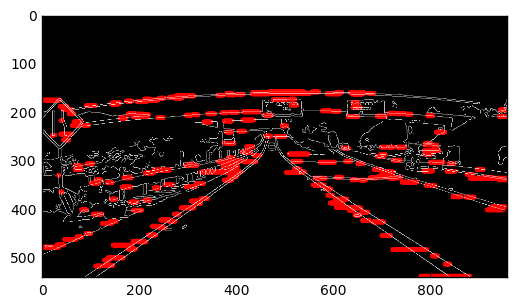

In [52]:
# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
plt.imshow(combo)

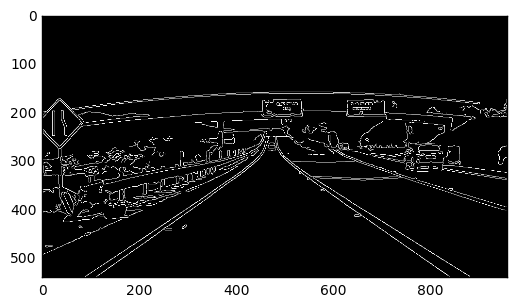

In [50]:
plt.imshow(color_edges)